Lag: 29
Coefficients: [ 5.54675509e-01  5.88626434e-01 -9.08625646e-02  4.79113699e-02
  4.05455412e-02  3.89006134e-02  2.68261674e-02  4.43330303e-02
  1.27693890e-02  3.74827042e-02 -8.70653192e-04  4.13881685e-03
  1.90238804e-02  2.63222728e-02  1.21637515e-04  2.50610458e-02
  7.17245384e-03  1.05980436e-02  3.45274786e-02 -8.36526688e-03
  2.42040280e-02  1.91951931e-02  1.17830915e-02 -1.84038777e-02
 -2.19275887e-03  1.68162294e-02  2.04248744e-02  8.42931168e-03
  6.70641474e-03 -1.52384382e-03]
predicted=14.207833, expected=10.000000
Test MSE: 3.087
predicted=14.354433, expected=12.900000
Test MSE: 3.087
predicted=14.143254, expected=14.600000
Test MSE: 3.087
predicted=14.155390, expected=14.000000
Test MSE: 3.087
predicted=13.797240, expected=13.600000
Test MSE: 3.087
predicted=13.675487, expected=13.500000
Test MSE: 3.087
predicted=13.717872, expected=15.700000
Test MSE: 3.087
predicted=13.802410, expected=13.000000
Test MSE: 3.087


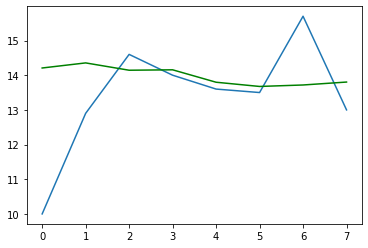

In [10]:

#AR_Model Fixed

import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
timeseries =pd.read_csv('daily-min-temp.csv',header=0,index_col=0)
#split the dataset
r=timeseries.values
trainseries,testseries = r[1:len(r)-8],r[len(r)-8:]

#train for autoregression

model = AR(trainseries)
model_fitting = model.fit()

print('Lag: %s'% model_fitting.k_ar)
print('Coefficients: %s' % model_fitting.params)


#make Prediction

predictn =model_fitting.predict(start=len(trainseries),end= (len(trainseries)+len(testseries)-1),dynamic=False)
for i in range (len(predictn)):
     print('predicted=%f, expected=%f' % (predictn[i], testseries[i]))
     error = mean_squared_error(testseries, predictn)
     print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(testseries)
pyplot.plot(predictn, color='green')
pyplot.show()

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


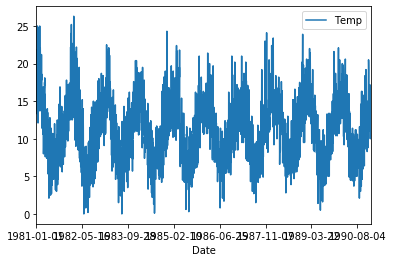

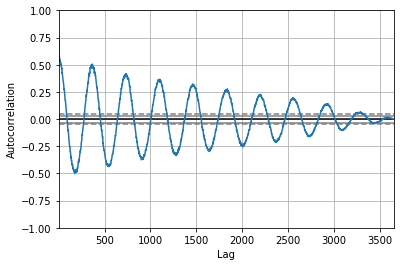

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D2.Temp   No. Observations:                 3648
Model:                 ARIMA(6, 2, 0)   Log Likelihood               -9008.613
Method:                       css-mle   S.D. of innovations              2.858
Date:                Tue, 28 Jan 2020   AIC                          18033.227
Time:                        03:57:36   BIC                          18082.842
Sample:                             2   HQIC                         18050.897
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.009      0.029      0.977      -0.017       0.017
ar.L1.D2.Temp    -1.0390      0.016    -64.508      0.000      -1.071      -1.007
ar.L2.D2.Temp    -1.0729      0.022    -

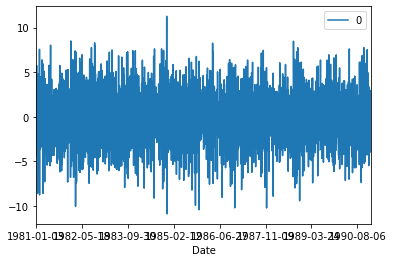

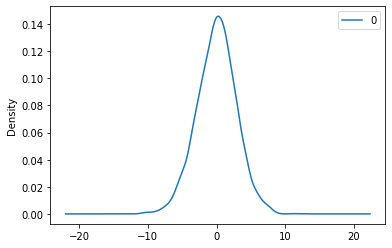

                 0
count  3648.000000
mean      0.001403
std       2.859540
min     -10.881140
25%      -1.866260
50%       0.086283
75%       1.862102
max      11.264263
predicted=6.405942, expected=8.900000
predicted=8.890902, expected=8.700000
predicted=8.282123, expected=4.900000
predicted=5.799306, expected=7.000000
predicted=7.643748, expected=7.500000
predicted=7.161990, expected=7.000000
predicted=7.120258, expected=9.100000
predicted=8.523312, expected=11.800000
predicted=9.794630, expected=9.900000
predicted=8.854470, expected=5.600000
predicted=6.648145, expected=4.200000
predicted=6.128837, expected=4.300000
predicted=6.115478, expected=8.000000
predicted=8.245959, expected=5.100000
predicted=5.419574, expected=9.400000
predicted=8.158898, expected=9.100000
predicted=7.573994, expected=9.700000
predicted=8.394108, expected=10.600000
predicted=9.668661, expected=8.600000
predicted=8.200725, expected=10.100000
predicted=10.036292, expected=11.000000
predicted=10.420767, expec

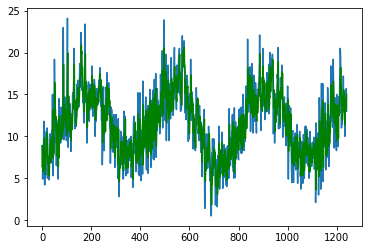

In [11]:
import pandas as pd
#from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 


#def parser(x):
	#return datetime.strptime('190'+x, '%Y-%m')
timeseries = pd.read_csv('daily-min-temp.csv', header=0,index_col=0)
print(timeseries.head())
timeseries.plot()
pyplot.show()
autocorrelation_plot(timeseries)
pyplot.show()
# fit model
model = ARIMA(timeseries, order=(6,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

X = timeseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictn = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictn.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictn)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictn, color='green')
pyplot.show()

predicted=17.266667, expected=15.800000
predicted=16.450000, expected=17.400000
predicted=16.366667, expected=21.800000
predicted=16.866667, expected=20.000000
predicted=17.766667, expected=16.200000
predicted=17.833333, expected=13.300000
predicted=17.416667, expected=16.700000
predicted=17.566667, expected=21.500000
predicted=18.250000, expected=25.000000
predicted=18.783333, expected=20.700000
predicted=18.900000, expected=20.600000
predicted=19.633333, expected=24.800000
predicted=21.550000, expected=17.700000
predicted=21.716667, expected=15.500000
predicted=20.716667, expected=18.200000
predicted=19.583333, expected=12.100000
predicted=18.150000, expected=14.400000
predicted=17.116667, expected=16.000000
predicted=15.650000, expected=16.500000
predicted=15.450000, expected=18.700000
predicted=15.983333, expected=19.400000
predicted=16.183333, expected=17.200000
predicted=17.033333, expected=15.500000
predicted=17.216667, expected=15.100000
predicted=17.066667, expected=15.400000


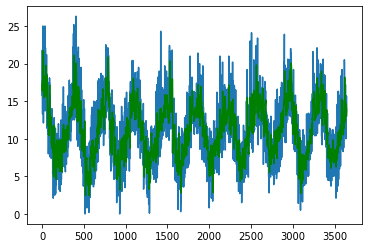

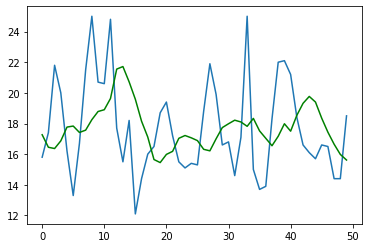

In [12]:
import pandas as pd
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
timeseries=pd.read_csv('daily-min-temp.csv',header=0,index_col=0)

#prepare situation

t=timeseries.values
window =6
history = [t[i] for i in range(window)]
testseries = [t[i] for i in range(window, len(t))]
predictn=list()

# walk forward over time steps in test
for r in range(len(testseries)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	ob = testseries[r]
	predictn.append(yhat)
	history.append(ob)
	print('predicted=%f, expected=%f' % (yhat, ob))
error = mean_squared_error(testseries, predictn)
# plot
pyplot.plot(testseries)
pyplot.plot(predictn, color='green')
pyplot.show()
# zoom plot
pyplot.plot(testseries[0:50])
pyplot.plot(predictn[0:50], color='green')
pyplot.show()

